In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from matplotlib import pyplot as plt

In [2]:
# Provide the number data.
# Consider the following sets of numbers. Can you see the relationship between them?
# Y=3X+1
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0, 16.0], dtype=float)

In [3]:
# This callback will stop the training when there is no improvement in
# the loss for 10 consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Define and compile the neural network
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(1,)),
        Dense(units=25, activation='relu', kernel_regularizer='l1_l2', name='Layer1'),
        Dense(units=15, activation='relu', kernel_regularizer='l1_l2', name='Layer3'),
        Dense(units=10, activation='relu', kernel_regularizer='l1_l2', name='Layer4'),
        Dense(units=1, activation='linear', name='Layer5')
    ], name="relationship"
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error')

In [4]:
model.summary()

Model: "relationship"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 25)                50        
                                                                 
 Layer3 (Dense)              (None, 15)                390       
                                                                 
 Layer4 (Dense)              (None, 10)                160       
                                                                 
 Layer5 (Dense)              (None, 1)                 11        
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train the neural network
history = model.fit(xs, ys, epochs=5000, batch_size=128, callbacks=[callback], verbose=1)

Epoch 1/5000
1/1 [==============================] - 4s 4s/step - loss: 74.3329
Epoch 2/5000
1/1 [==============================] - 0s 25ms/step - loss: 69.9216
Epoch 3/5000
1/1 [==============================] - 0s 34ms/step - loss: 64.9996
Epoch 4/5000
1/1 [==============================] - 0s 27ms/step - loss: 59.7241
Epoch 5/5000
1/1 [==============================] - 0s 20ms/step - loss: 54.1544
Epoch 6/5000
1/1 [==============================] - 0s 21ms/step - loss: 48.1526
Epoch 7/5000
1/1 [==============================] - 0s 24ms/step - loss: 41.8116
Epoch 8/5000
1/1 [==============================] - 0s 24ms/step - loss: 35.2064
Epoch 9/5000
1/1 [==============================] - 0s 16ms/step - loss: 28.4875
Epoch 10/5000
1/1 [==============================] - 0s 19ms/step - loss: 21.5442
Epoch 11/5000
1/1 [==============================] - 0s 15ms/step - loss: 14.9170
Epoch 12/5000
1/1 [==============================] - 0s 20ms/step - loss: 9.0699
Epoch 13/5000
1/1 [=========

In [6]:
print(f"Only {len(history.history['loss'])} epochs ran.")

Only 1687 epochs ran.


In [7]:
model.summary()

Model: "relationship"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 25)                50        
                                                                 
 Layer3 (Dense)              (None, 15)                390       
                                                                 
 Layer4 (Dense)              (None, 10)                160       
                                                                 
 Layer5 (Dense)              (None, 1)                 11        
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


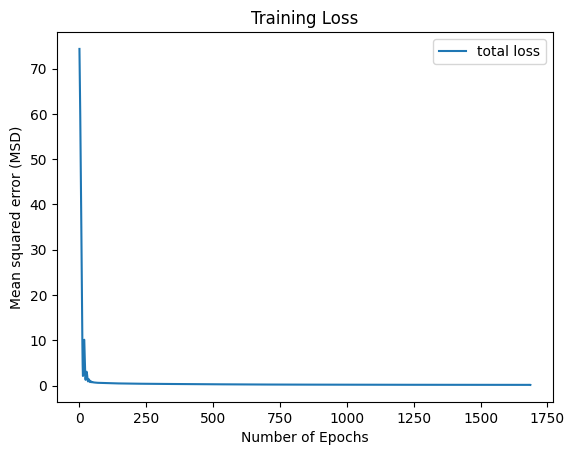

In [8]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.title('Training Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean squared error (MSD)')
plt.legend()
plt.show()

In [9]:
# Use the model on unseen number data
print(model.predict([5.0]))

1/1 [==============================] - 0s 173ms/step
[[16.04139]]


In [15]:
print(model.predict([3.0]))

1/1 [==============================] - 0s 57ms/step
[[10.145695]]
